Project 1: Alex and Griffith

# Q: What portion of the cat population in Washington, D.C. would have to be neutered to maintain cat and rat populations?

In urban areas, rats pose a health risk and are often unsightly. Cats are heralded as a way to curb rat populations, but environmentalists and other critics take issue with the proliferation of feral cats that kill other small animals and pose their own health concerns. The most accepted method of curbing feral cat populations is Trap-Neuter-Return, which sterilizes cats before returning them to the wild. In this way, feral cat populations can be stabilized without eliminating them completely and thus reintroducing rats. 

# This model aims to determine how to indirectly control rat populations by directly controlling feral cat populations.

In [215]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# Methods

We will now define the functions for this model.

The following code plots the population of cats and rats over time, taking in a generated TimeSeries.

In [216]:
def plot_results(TotalCatPop, RatPop, title):
    plot(TotalCatPop, label='Cat Population')
    plot(RatPop, label='Rat Population')
    title = title
    
    decorate(xlabel = 'Year',
             ylabel = 'Washington, D.C. Population (Millions)',
            title=title)

The update_population function simulates one year of cats and rats being born and dying at a specific percent of neutered cats.

In [217]:
def update_population(populations, rates, percent_neutered):
    
    populations.cats = update_cat (populations.cats, rates, percent_neutered)
    populations.rats = update_rat (populations, rates)
    
    return populations

This is the function for updating cat populations over one year, run in update_population. The number of cats born is mitigated by the percentage of the population that has been neutered.

In [218]:
def update_cat(pop, rates, percent_neutered):
    growth = rates.cat_growth_coefficient * ((1-percent_neutered) * pop)
    death = rates.cat_death_coefficient * pop
    if(pop + growth - death <= 0): #Checks to see if population is 0
        pop = 0
        return pop
    return pop + growth - death

This function updates the rat populations. Of note is the fact that the amount of rats that die is contingent on both natural death and cat kill rates.

In [219]:
def update_rat(populations, rates):
    pop_change = (rates.rat_growth_coefficient * populations.rats)-(rates.rat_death_coefficient * populations.rats)-(rates.rat_killed_coefficient * populations.cats)
    if(populations.rats + pop_change <= 0): #Checks to see if population is 0
        populations.rats = 0
        return populations.rats
    return populations.rats + pop_change

The model relies on 3 populations: the population of rats, the population of un-neutered cats, and the population of neutered cats. This cell establishes those parameters.

Here's some information on where we got our data from:

**Cat population:** While it was difficult to find a good estimate of cat populations (There's a program to count all the cats in D.C. right now, but it won't be done for 3 years!) information regarding Rhode Island's cat populations yielded the ratio of 200 cats per square mile, or 13,668 cats. Rhode Island's values were the most well-researched available, and since both are somewhat urban and in the northeast of America they are hopefully comparable.

**Rat population:** Every major monument or urban area documented seems to have 100-125 rat burrows, with 10 rats per burrow. Taking the median, we get 1,125 rats per monument. I am using the subway stations to mark every monument. With 91 active stations, that makes 102,375 rats.

**Rat growth coefficient:** A Washingtonian article described the reproduction rates of rats, which when counted over a year and divided in half (we are assuming half of the population is female) leads to 81 rats per 1 rat per year.

**Rat death coefficient:** Black rats, which are the main offenders in Washington, D.C., have a mortality rate of about 96% under crowded conditions, which we are assuming due to the urban environment.

**Rat killed coefficient:** There are a lot of conflicting studies regarding the rate at which cats kill rats. However, estimates show that about 9 rats are killed per cat per year (most recent studies show that cats avoid large prey) and rats are about 1.19 times as likely to hide if they are in the presence of a cat. We chose 10 as it was close to the value but generated a visible relationship.

**Cat growth coefficient:** An estimated 4.9 cats are born per female cat per year. Halved, that is 2.45.

**Cat death coefficient:** In the wild, with a level of human intervention (which is to be expected of urban feral cats), feral cats have an estimated life cycle of 7.1 years. Therefore, 0.14 cats per cat die per year.

The **percent neutered** is not available in a state or system object, as it is a parameter of the function. It assumes there is a constant percent of cats that will not reproduce.

In [220]:
populations = State(cats = .013668, rats = .102375) #Establishes the cat and rat population in millions
rates = System()#Opens an empty rate System

#This cell allows easy access to change model parameters such as cat population
#All need updating except cat_death_coefficient
rates.rat_growth_coefficient = 81 #Establishes how rats are born
rates.rat_death_coefficient = 76 #Establishes how rat pop dies without cat influence (Life expectancy and premature death)
rates.rat_killed_coefficient = 10 #Establishes how many rats are killed by cats

timescale = 10 #Sets the timescale for the predictions in years
rates.cat_growth_coefficient = 2.45 #Establishes how cats grow
rates.cat_death_coefficient = .14 #Establishes the cat death

This following code block generates data based off of the percent neutered and runs a simulation over a number of years. A temporary population variable is created to preserve the initial condition for testing with various percents of cats neutered.

# Results

Saving figure to file figs/project-1.pdf


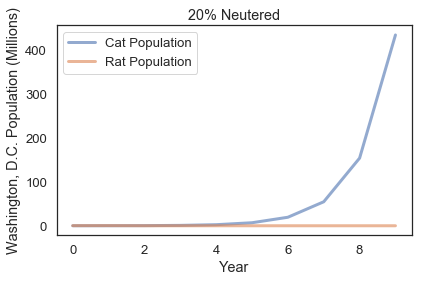

In [221]:
populationsTemp = State(cats = populations.cats, rats = populations.rats)
timescale = 10 #Number of years to run program
percent_neutered = .2 #should be expressed as .%% (ie 30% = .30)
ratData = TimeSeries()
catData = TimeSeries()
#populationsTemp = populations #Establishes temp data for cat and rat population as to not change overall state

for year in range (timescale):
    oneYearResults = update_population(populationsTemp, rates, percent_neutered)
    ratData[year] = oneYearResults.rats
    catData[year] = oneYearResults.cats
plot_results(catData, ratData, '20% Neutered')
savefig('figs/project-1.pdf')

When 20% of the cat population is neutered, the cats repopulate very quickly and keep rats at a low level.

Saving figure to file figs/project-1.1.pdf


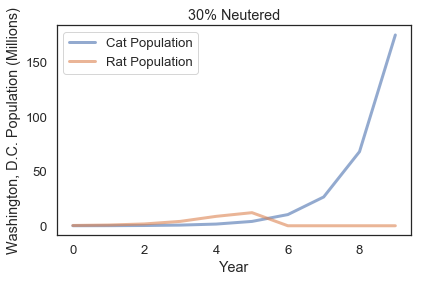

In [222]:
populationsTemp = State(cats = populations.cats, rats = populations.rats)
percent_neutered = .3 #should be expressed as .%% (ie 30% = .30)
#populationsTemp = populations #Establishes temp data for cat and rat population as to not change overall state

for year in range (timescale):
    oneYearResults = update_population(populationsTemp, rates, percent_neutered)
    ratData[year] = oneYearResults.rats
    catData[year] = oneYearResults.cats
plot_results(catData, ratData, '30% Neutered')
savefig('figs/project-1.1.pdf')

At 30% of the cat population neutered, the rats are not completely suppressed, but they are controlled by the cat population.

Saving figure to file figs/project-1.2.pdf


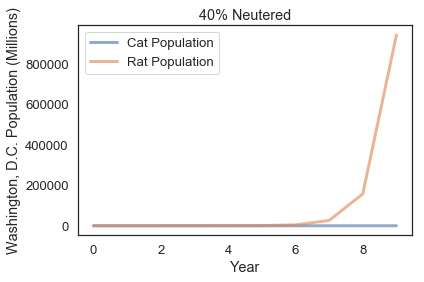

In [223]:
populationsTemp = State(cats = populations.cats, rats = populations.rats)
percent_neutered = .4 #should be expressed as .%% (ie 30% = .30)
#populationsTemp = populations #Establishes temp data for cat and rat population as to not change overall state

for year in range (timescale):
    oneYearResults = update_population(populationsTemp, rates, percent_neutered)
    ratData[year] = oneYearResults.rats
    catData[year] = oneYearResults.cats
plot_results(catData, ratData, '40% Neutered')
savefig('figs/project-1.2.pdf')

By 40% neutered, the rats overtake cats.

# Interpretation

This model suggests that neutering about 30% of feral cat populations slows down cat population growth but also keeps rat populations down.

The model is **incredibly sensitive**--changes within 1% of 30 produce curves similar to those seen at 20% and 40%. This is unrealistic. Likely, this is due to the fact that the model does not take into account carrying capacity--mortality and birth rates change at a certain level of overpopulation.

Another consideration would be dynamically changing the percent neutered. This model assumes that every year, more cats will be neutered to maintain a neutered population of the indicated percent. In reality, TNR programs might alter the rates at which they neuter feral cats depending on their needs. Perhaps in a future investigation, a sweep series or manual input could be used to model a dynamic neutering program.

Overall, we learned how to create relationships between different data sets in this model, and used extensive research to formulate ideas of what accurate values would be. Though this model ultimately does not accurately represent the growth of the populations, which would likely be more logistic rather than exponential, it was a valuable learning tool.